<a href="https://colab.research.google.com/github/chetanvartak/llm_journey/blob/main/ML_LinearLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 What This Notebook Covers
**About**: An attempt to understand Machine Learning (ML) / Neural Network using an example. The example uses a Linear Layer - A basic building block of a Neural Network.

Note: Google Gemini is used for learning and code generation.

<br />

**Example**: Predict the **House-Price** and **days-in-market** (aka output feature) based on **house_size**, **num_bedrooms**, **age_of_house** (aka input feature).


The machine learning model will **LEARN** based on the training data. And then be able to predict

     2 Outputs(Feature): [predicted_price, predicted_days_on_market])
FROM

     3 Inputs(Feature): [house_size, num_bedrooms, age_of_house]  

<br />

**Sample Training Data**
| house_size | num_bedrooms | age_of_house | <<>> | actual_price,  | actual_days_on_market |
|---|---|---|---|---|---|
|1500.0| 3.0| 20.0| |7000|7|  
|1200.0| 2.0| 5.0| |8000|8|   
|1800.0| 4.0| 15.0| |9000|9|  
|2500.0| 5.0| 1.0| |5000|5|   
|2900.0|  2.0| 30.0| |47000|17|

---
<br />


####**What does "LEARN" or "Training" Means?**
It simply means finding the value of W and b in this equation -

    y = Wx + b

The expression y = Wx + b is the formula for a straight line and is a fundamental building block in machine learning and algebra.

The training/Learning starts with **random value** for weights(W) and biases(b). And looping through the provided training data, the weights and biases are adjusted. The Final value of weights(W) and biases(b) can then be used for all future predictions/Calculations.

See end of page for more explaination.

<br />

Each component in the y = Wx + b equation has a specific role:

**x (Input)**: This is your independent variable—the value you already know. For example, the number of hours you study.

**W (Weight or Slope)**: This number determines the steepness of the line. It's the "multiplier" that tells you how much y changes for a one-unit change in x. A large W means a steep line; a small W means a flatter line.

**b (Bias or Y-Intercept)**: This is the starting point or baseline value. It's the value of y when x is zero. It shifts the entire line up or down without changing its steepness.

**y (Output)**: This is the dependent variable—the value you are trying to predict or calculate. For example, the test score you might get.

<br />

**Learning/Training for simple 1-Input, 1-Output example**

Calculate "Predict" taxi fare(y) based on distance(x).  
To predict taxi fare, we need to find -
   - Cost per Mile (W) and
   - Base Fare (b)

In [3]:
import torch
import torch.nn as nn

# Our 5 known data points: [miles, total_cost]
trip_data = [
    [2.5, 12.00],
    [5.0, 19.50],
    [1.0, 7.25],
    [10.0, 34.00],
    [6.5, 23.75]
]

# Separate the data into inputs (X) and known outputs (Y)
# and convert them to PyTorch tensors.
X_train = torch.tensor([[trip[0]] for trip in trip_data], dtype=torch.float32)
Y_train = torch.tensor([[trip[1]] for trip in trip_data], dtype=torch.float32)

# The shape should be (5, 1) for both tensors.
print(f"Input shape (miles): {X_train.shape}")
print(f"Output shape (cost): {Y_train.shape}")

# Define the model to take 1 input (miles) and give 1 output (cost)
model = nn.Linear(in_features=1, out_features=1)

# Set up the loss function and optimizer
learning_rate = 0.01
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 300
print("\n--- Starting Training ---")
for epoch in range(num_epochs):
    # Make a prediction for all 5 trips at once
    y_pred = model(X_train)

    # Calculate the average loss across all 5 trips
    loss = loss_fn(y_pred, Y_train)

    # Perform backpropagation and update the weights
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Print the progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the learned parameters
learned_W = model.weight.item()
learned_b = model.bias.item()

print("\n--- Training Finished ---")
print(f"Discovered Cost per Mile (W): ${learned_W:.2f}")
print(f"Discovered Base Fare (b):     ${learned_b:.2f}")

# Let's see how well the model's predictions match the original data
print("\n--- Model Predictions vs. Actual Costs ---")
with torch.no_grad(): # We don't need to track gradients for this part
    predicted_costs = model(X_train).numpy()
    for i in range(len(trip_data)):
        miles = trip_data[i][0]
        actual_cost = trip_data[i][1]
        predicted_cost = predicted_costs[i][0]
        print(f"Trip {i+1} ({miles} miles): Predicted Cost ${predicted_cost:.2f} | Actual Cost ${actual_cost:.2f}")



Input shape (miles): torch.Size([5, 1])
Output shape (cost): torch.Size([5, 1])

--- Starting Training ---
Epoch [50/300], Loss: 3.7382
Epoch [100/300], Loss: 2.1498
Epoch [150/300], Loss: 1.2401
Epoch [200/300], Loss: 0.7191
Epoch [250/300], Loss: 0.4207
Epoch [300/300], Loss: 0.2498

--- Training Finished ---
Discovered Cost per Mile (W): $3.09
Discovered Base Fare (b):     $3.60

--- Model Predictions vs. Actual Costs ---
Trip 1 (2.5 miles): Predicted Cost $11.32 | Actual Cost $12.00
Trip 2 (5.0 miles): Predicted Cost $19.05 | Actual Cost $19.50
Trip 3 (1.0 miles): Predicted Cost $6.69 | Actual Cost $7.25
Trip 4 (10.0 miles): Predicted Cost $34.51 | Actual Cost $34.00
Trip 5 (6.5 miles): Predicted Cost $23.69 | Actual Cost $23.75


**Once we know, W and b, we can plot it on a graph.**

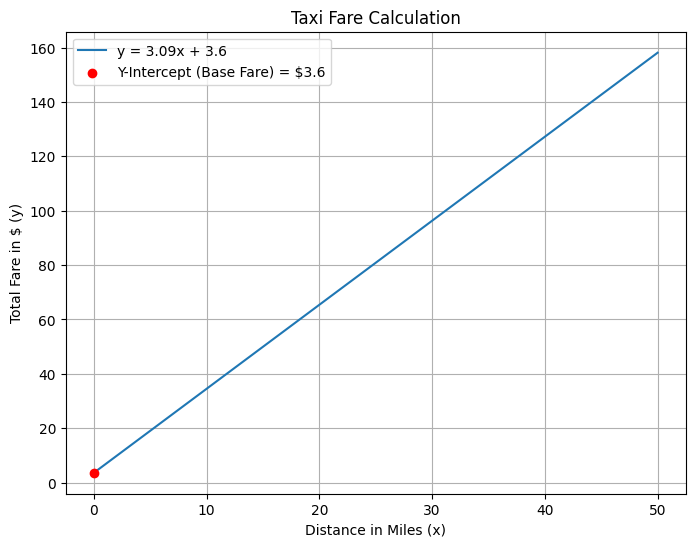

In [4]:
# A Simple example to understand y = Wx + b.
# Determine taxi fare based on
# W = 3.09  # Cost per mile
# b = 3.60  # Base fare

import numpy as np
import matplotlib.pyplot as plt

# Input: Taxi fare parameters from our example
W = 3.09  # Cost per mile
b = 3.60  # Base fare

# Generate a range of distances (x values) from 0 to 50 miles
x_values = np.linspace(0, 50, 100) # 100 points between 0 and 50

#==============================
# Output: Calculate the corresponding y values (total fare) for each distance
y_values = (W * x_values) + b

# Plotting the line
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=f'y = {W}x + {b}')

# Highlight the y-intercept (the base fare when distance x=0)
plt.scatter(0, b, color='red', zorder=5, label=f'Y-Intercept (Base Fare) = ${b}')

# Adding labels and title for clarity
plt.title('Taxi Fare Calculation')
plt.xlabel('Distance in Miles (x)')
plt.ylabel('Total Fare in $ (y)')
plt.grid(True)
plt.legend()
plt.show()

###**LEARNING for 3-Input, 2-OUTPUT**

A **linear transform** (or linear layer) in a neural network is the **multi-dimensional version** of y = Wx + b. Instead of working with single numbers, it uses vectors and matrices to transform multiple inputs into multiple outputs simultaneously.

<br />

**y = Wx + b**


1.   **x** becomes an Input Vector: A list representing all the input features.

    x = [x₁, x₂, x₃] ==> [house_size, num_bedrooms, age_of_house]

2.   **W** becomes a **Weight Matrix**: This is the heart of the layer. It's a grid of numbers where each weight, **Wᵢⱼ**, represents the strength of the connection from the j-th input to the i-th output. You can think of it as a set of "knobs" the network learns to tune.
3.   **b** becomes a Bias Vector: Each output gets its own starting value or "offset".

    b = [b₁, b₂, ...]

4.   **y** becomes an Output Vector: The final list of calculated values after the transformation.

    y = [y₁, y₂] ==> [predicted_price, predicted_days_on_market]

<br />

**The Math: Matrix Multiplication**

The formula y = Wx + b still looks the same, but the multiplication is now matrix multiplication.

<br />

This operation effectively computes a "weighted sum" of all inputs for each output. For example, to get the first output y₁, you would multiply every input xⱼ by its corresponding weight in the first row of the matrix W and then add the first bias b₁.

y₁ = (W₁₁ * x₁) + (W₁₂ * x₂) + (W₁₃ * x₃) + ... + b₁

y₂ = (W₂₁ * x₁) + (W₂₂ * x₂) + (W₂₃ * x₃) + ... + b₂

...and so on for all outputs.


Once we know 6 values of W -  W₁₁, W₁₂, W₁₃, W₂₁, W₂₂, W₂₃
and 2 values of b - b₁, b₂
We can perform matrix multiplication to predict the house_price and days_in_market.

<br />

\begin{align*}
\text{predicted_price} &= (W_{11} \times \text{size}) + (W_{12} \times \text{beds}) + (W_{13} \times \text{age}) + b_1 \\
\text{predicted_days} &= (W_{21} \times \text{size}) + (W_{22} \times \text{beds}) + (W_{23} \times \text{age}) + b_2
\end{align*}
<br />

[Matrix Multiplication for this example](https://drive.google.com/file/d/1E2QF2UaD8zZjSrTIXcbk6ghugngbFTLH/view?usp=sharing)




In [5]:
# Training with a Batch of Data

import torch
import torch.nn as nn

# 1. Setup
# --------------------------------------------------------------------------
# The model, loss, and optimizer definitions are IDENTICAL to before.
model = nn.Linear(in_features=3, out_features=2)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# --- The ONLY change is here: providing a batch of data ---
# input_data is now a (5, 3) tensor
input_data = torch.tensor([
    [1500.0, 3.0, 20.0],
    [1200.0, 2.0, 5.0],
    [1800.0, 4.0, 15.0],
    [2500.0, 5.0, 1.0],
    [3900.0, 2.0, 30.0]
])

# true_output is now a (5, 2) tensor
true_output = torch.tensor([
    [7000.0, 7.0],
    [8000.0, 8.0],
    [9000.0, 9.0],
    [5000.0, 5.0],
    [47000.0, 17.0]
])
# ---------------------------------------------------------

# We'll train for more epochs since the task is harder
num_epochs = 1000

# 2. Training Loop
# --------------------------------------------------------------------------
print("--- Starting Training ---")
for epoch in range(num_epochs):
    # The training loop logic is IDENTICAL to before.
    predicted_output = model(input_data)
    loss = loss_fn(predicted_output, true_output)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 3. Final Results
# --------------------------------------------------------------------------
print("\n--- Training Finished ---")

final_prediction = model(input_data)

# Use detach() to safely convert to NumPy for printing
final_prediction_np = final_prediction.detach().numpy()
true_output_np = true_output.numpy()

print("\n--- Comparison of Final Predictions vs Actual Data ---")
for i in range(len(true_output_np)):
    print(f"Sample {i+1}: Prediction: [{final_prediction_np[i][0]:.1f}, {final_prediction_np[i][1]:.1f}]  |  Actual: {true_output_np[i]}")


print("\n--- Final Model Parameters ---")
print("Final Weights:\n", model.weight.data)
print("\nFinal Bias:\n", model.bias.data)

--- Starting Training ---
Epoch [100/1000], Loss: 55000984.0000
Epoch [200/1000], Loss: 52448204.0000
Epoch [300/1000], Loss: 52073416.0000
Epoch [400/1000], Loss: 51674612.0000
Epoch [500/1000], Loss: 51255860.0000
Epoch [600/1000], Loss: 50820792.0000
Epoch [700/1000], Loss: 50372512.0000
Epoch [800/1000], Loss: 49913588.0000
Epoch [900/1000], Loss: 49446284.0000
Epoch [1000/1000], Loss: 48972520.0000

--- Training Finished ---

--- Comparison of Final Predictions vs Actual Data ---
Sample 1: Prediction: [12688.3, 8.6]  |  Actual: [7000.    7.]
Sample 2: Prediction: [9592.5, 5.1]  |  Actual: [8000.    8.]
Sample 3: Prediction: [14725.9, 7.9]  |  Actual: [9000.    9.]
Sample 4: Prediction: [19473.5, 6.3]  |  Actual: [5000.    5.]
Sample 5: Prediction: [32422.1, 17.0]  |  Actual: [4.7e+04 1.7e+01]

--- Final Model Parameters ---
Final Weights:
 tensor([[ 7.9655e+00, -8.7496e+01,  5.2909e+01],
        [ 2.4836e-03, -4.1517e-01,  2.0582e-01]])

Final Bias:
 tensor([-55.6498,   1.9550])


# How a neural network "learns".

**Step 1: Comparing Predictions to Actual Data (The Loss Function)**

First, for training, you must have the correct answers, known as **ground truth** or labels. For each input house, you need the actual known values.

    Model's Prediction: [predicted_price, predicted_days_on_market]
    Ground Truth: [actual_price, actual_days_on_market]

The loss function is a mathematical formula that measures the "**error**" or "**distance**" between the model's prediction and the ground truth.

Calculate Individual Errors: The function first calculates the error for each output independently. A common method for this kind of regression problem is Mean Squared Error (MSE), which is (prediction - actual)².

    error_price = (predicted_price - actual_price)²
    error_days = (predicted_days - actual_days)²

Combine into a Single Loss Score: The individual errors are then combined (usually by averaging them) into a single number called the total loss.

    total_loss = (error_price + error_days) / 2

This single total_loss value tells us, on the whole, how wrong the model was for that one piece of data. The goal of training is to make this number as small as possible.

<br />

**Step 2: Adjusting Weights and Biases (Backpropagation and Optimizer)**

Now that we have a single error score (total_loss), the network uses it to adjust its parameters.

**Backpropagation (Assigning Blame)**: Backpropagation is the algorithm that calculates the contribution of every single weight and bias in the network to the final total_loss. It does this by computing a gradient for each parameter. The gradient is a vector that tells us two things:

Direction: Should we increase or decrease this weight to reduce the error?

Magnitude: How much impact does this weight have on the final error? (A large gradient means a large impact).

**Optimizer (Making the Adjustment)**: The optimizer (like "Adam" or "SGD") takes the gradients calculated by backpropagation and updates the weights and biases. It uses a hyperparameter called the learning rate to determine the size of the adjustment.

The update rule is conceptually simple:

     new_weight = old_weight - (learning_rate * gradient)


By subtracting a small fraction of the gradient, the optimizer nudges each weight in the direction that will lower the total loss.

<br />

**The Training Loop** 🔄

This entire process forms a loop that is repeated thousands of times:

**Forward Pass**: Take a batch of houses and make predictions.

**Calculate Loss**: Compare the batch of predictions to the batch of actual labels to get a single average loss score.

**Backward Pass**: Perform backpropagation to calculate the gradients for all weights and biases based on the loss.

**Optimizer Step**: Update all the weights and biases using the gradients and the learning rate.

**Repeat**: Grab the next batch of data and start over.

With each iteration, the weights and biases are slightly improved, causing the total_loss to gradually decrease and the model's predictions to become more accurate.

[Diagram of training process](https://drive.google.com/file/d/1cfCZkb-qB1cB-mwjOhtPMFbe_3basHaQ/view?usp=drive_link)
